# Модуль 2. Фильтрация и анализ данных

## 0 Предисловие

### 0.1 Импорт библиотек

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import cv2

In [ ]:
from PIL import Image

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import os

In [ ]:
from scipy.io import wavfile

In [ ]:
import pickle as pkl

In [ ]:
import scipy.signal as signal

### 0.2 Сбор датасетов по таблице соответствия

#### 0.2.1 Загрузка результатов модуля 1

In [ ]:
# датасеты из Excel
try:
    with open('..\\C1_M1\\xlsx_dfs.data', 'rb') as f:
        xlsx_dfs = pkl.load(f)
except Exception as e:
    print(e)

In [ ]:
# датасеты из WAV
try:
    with open('..\\C1_M1\\waves.data', 'rb') as f:
        waves_dfs = pkl.load(f)
except Exception as e:
    print(e)

In [ ]:
# датасеты из MKV
try:
    with open('..\\C1_M1\\video_dfs.data', 'rb') as f:
        video_dfs = pkl.load(f)
except Exception as e:
    print(e)

In [ ]:
# датасеты из CSV
try:
    with open('..\\C1_M1\\csv_dfs.data', 'rb') as f:
        csv_dfs = pkl.load(f)
except Exception as e:
    print(e)

#### 0.2.1 Приведение к одной частоте

Поскольку итоговый датасет должен содержать посекундные значения, то приведем все данные таблиц к частоте 1 Гц

In [ ]:
# функция для создания единого датафрейма из всех представленных данных
def create_full_df(co2_num, amper_num, vl_num, v_num, wav_num, wav_herz, ws_num, t_num, volt_num, volt_herz, video_num, num_experiment):
    """
    co2_num - Номер файла, из которого берётся Уровень co2
    amper_num - Номер файла, из которого берётся Ток
    vl_num - Номер файла, из которого берётся Влажность
    v_num - Номер файла, из которого берётся Давление
    wav_num - Номер файла, из которого берётся Акустика
    wav_herz - Герц для WAV
    ws_num - Номер файла, из которого берётся Скорость ветра
    t_num - Номер файла, из которого берётся Температура окр. среды
    volt_num - Номер файла, из которого берётся Напряжение
    volt_herz - частота для напряжения
    video_num - Номер файла, из которого берётся Видео с тепловизора
    num_experiment - номер эксперимента
    """
    
    csv_files = ['C:\\data\\13.csv', 'C:\\data\\14.csv', 'C:\\data\\17.csv', 'C:\\data\\24.csv', 'C:\\data\\26.csv', 'C:\\data\\36.csv', 'C:\\data\\38.csv', 'C:\\data\\46.csv', 'C:\\data\\50.csv', 'C:\\data\\52.csv', 'C:\\data\\55.csv', 'C:\\data\\56.csv', 'C:\\data\\59.csv', 'C:\\data\\68.csv', 'C:\\data\\7.csv', 'C:\\data\\71.csv', 'C:\\data\\8.csv', 'C:\\data\\9.csv']
    xlsx_files = ['C:\\data\\1.xlsx', 'C:\\data\\10.xlsx', 'C:\\data\\12.xlsx', 'C:\\data\\15.xlsx', 'C:\\data\\16.xlsx', 'C:\\data\\19.xlsx', 'C:\\data\\2.xlsx', 'C:\\data\\20.xlsx', 'C:\\data\\21.xlsx', 'C:\\data\\22.xlsx', 'C:\\data\\23.xlsx', 'C:\\data\\25.xlsx', 'C:\\data\\27.xlsx', 'C:\\data\\3.xlsx', 'C:\\data\\31.xlsx', 'C:\\data\\32.xlsx', 'C:\\data\\33.xlsx', 'C:\\data\\34.xlsx', 'C:\\data\\35.xlsx', 'C:\\data\\37.xlsx', 'C:\\data\\39.xlsx', 'C:\\data\\4.xlsx', 'C:\\data\\41.xlsx', 'C:\\data\\42.xlsx', 'C:\\data\\43.xlsx', 'C:\\data\\44.xlsx', 'C:\\data\\45.xlsx', 'C:\\data\\47.xlsx', 'C:\\data\\48.xlsx', 'C:\\data\\49.xlsx', 'C:\\data\\51.xlsx', 'C:\\data\\53.xlsx', 'C:\\data\\54.xlsx', 'C:\\data\\57.xlsx', 'C:\\data\\58.xlsx', 'C:\\data\\6.xlsx', 'C:\\data\\61.xlsx', 'C:\\data\\62.xlsx', 'C:\\data\\63.xlsx', 'C:\\data\\64.xlsx', 'C:\\data\\65.xlsx', 'C:\\data\\67.xlsx', 'C:\\data\\69.xlsx', 'C:\\data\\70.xlsx', 'C:\\data\\72.xlsx']
    wav_files = ['C:\\data\\11.wav', 'C:\\data\\18.wav', 'C:\\data\\28.wav', 'C:\\data\\29.wav', 'C:\\data\\30.wav', 'C:\\data\\40.wav', 'C:\\data\\5.wav', 'C:\\data\\60.wav', 'C:\\data\\66.wav']
    mkv_files = ['C:\\data\\video1.mkv', 'C:\\data\\video2.mkv', 'C:\\data\\video3.mkv', 'C:\\data\\video4.mkv', 'C:\\data\\video5.mkv', 'C:\\data\\video6.mkv', 'C:\\data\\video7.mkv', 'C:\\data\\video8.mkv', 'C:\\data\\video9.mkv']
    
    full_df = pd.DataFrame()
    
    # CO2
    ind = xlsx_files.index(f'C:\\data\\{co2_num}.xlsx')
    full_df['co2'] = xlsx_dfs[ind][0]

    # ток
    ind = csv_files.index(f'C:\\data\\{amper_num}.csv')
    full_df['a'] = pd.Series([csv_dfs[ind].iloc[i].values[0] for i in range(0, csv_dfs[ind].shape[0], volt_herz)])

    # влажность
    ind = xlsx_files.index(f'C:\\data\\{vl_num}.xlsx')
    full_df['vl'] = xlsx_dfs[ind][0]

    # давление
    ind = xlsx_files.index(f'C:\\data\\{v_num}.xlsx')
    full_df['v'] = xlsx_dfs[ind][0]

    # акустика
    ind = wav_files.index(f'C:\\data\\{wav_num}.wav')
    full_df['w'] = pd.Series([waves_dfs[ind][1][i] for i in range(0, waves_dfs[ind][1].shape[0], wav_herz)])

    # скорость ветра
    ind = xlsx_files.index(f'C:\\data\\{ws_num}.xlsx')
    full_df['ws'] = xlsx_dfs[ind][0]

    # температура
    ind = xlsx_files.index(f'C:\\data\\{t_num}.xlsx')
    full_df['t'] = xlsx_dfs[ind][0]

    # ток 1 эксперимента
    ind = csv_files.index(f'C:\\data\\{volt_num}.csv')
    full_df['volt'] = pd.Series([csv_dfs[ind].iloc[i].values[0] for i in range(0, csv_dfs[ind].shape[0], volt_herz)])

    # видео
    ind = mkv_files.index(f'C:\\data\\video{video_num}.mkv')
    video = video_dfs[0].head(full_df.shape[0])
    
    # добавляем признак "номер эксперимента"
    full_df['num_experiment'] = num_experiment
    
    # объединяем в один датасет
    full_df = pd.concat(
        (full_df.reset_index(drop=True), video.reset_index(drop=True)), 
        axis=1
    )
    
    return full_df

Формируем по датасетам эксперименты

In [ ]:
exp1_df = create_full_df(co2_num=72, amper_num=14, vl_num=27, v_num=51, wav_num=60, wav_herz=44100, ws_num=39, t_num=70, volt_num=59, volt_herz=5000, video_num=1, num_experiment=1)

In [ ]:
exp1_df

co2         a  vl    v       w   ws     t        volt  num_experiment  \
0    380 -0.923939  91  754  -113.0  5.7  28.9 -119.693490               1   
1    382 -0.708340  90  753    12.0  4.6  25.4  -91.697175               1   
2    377 -0.533348  90  749   -54.5  6.0  26.8  -68.598274               1   
3    395 -0.350177  91  752    -1.0  4.4  27.0  -44.586688               1   
4    376 -0.197387  91  751  -132.0  5.3  26.2  -24.469967               1   
..   ...       ...  ..  ...     ...  ...   ...         ...             ...   
279  342  1.196702  90  749  1745.5  4.1  27.6  161.722386               1   
280  321  0.996295  90  754 -1168.0  5.4  27.0  135.384261               1   
281  364  0.739504  90  754 -5506.5  4.3  27.1  100.922259               1   
282  304  0.497028  91  749  2418.0  4.9  25.6   68.311311               1   
283  332 -0.008373  90  751   466.5  5.4  25.4   38.104058               1   

       0  ...  76790  76791  76792  76793  76794  76795  76796  76797  76798  \
0    129  ...    128    128    128    128    128    128    128    128    128   
1    129  ...    128    128    128    128    128    128    128    128    128   
2    129  ...    128    128    128    128    128    128    128    128    128   
3    128  ...    128    128    128    128    128    128    128    128    128   
4    129  ...    128    128    128    128    128    128    128    128    128   
..   ...  ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
279  126  ...    128    128    128    128    128    128    128    128    128   
280  126  ...    128    128    128    128    128    128    128    128    128   
281  126  ...    128    128    128    128    128    128    128    128    128   
282  126  ...    128    128    128    128    128    128    128    128    128   
283  126  ...    128    128    128    128    128    128    128    128    128   

     76799  
0      128  
1      128  
2      128  
3      128  
4      128  
..     ...  
279    128  
280    128  
281    128  
282    128  
283    128  

[284 rows x 76809 columns]

In [ ]:
exp2_df = create_full_df(co2_num=23, amper_num=13, vl_num=54, v_num=33, wav_num=29, wav_herz=192000, ws_num=15, t_num=19, volt_num=26, volt_herz=5000, video_num=2, num_experiment=2)

In [ ]:
exp2_df

co2         a  vl    v       w   ws     t        volt  num_experiment  \
0    301  1.518057  91  749  -177.0  4.1  26.8  199.899203               2   
1    398  1.604531  90  754    64.5  5.2  27.0  211.493666               2   
2    307  1.644262  91  749   -79.5  5.7  28.6  217.355131               2   
3    305  1.671430  91  750  -132.0  4.9  26.9  221.262811               2   
4    366  1.683408  90  750  -256.5  4.3  27.7  222.869582               2   
..   ...       ...  ..  ...     ...  ...   ...         ...             ...   
276  354 -1.247339  90  752   -65.0  5.7  28.2 -166.868212               2   
277  348 -1.197090  91  751   814.5  5.2  27.3 -160.286871               2   
278  320 -1.143044  90  749  1991.5  5.0  26.1 -152.972894               2   
279  312 -1.090167  91  752   424.5  5.4  26.4 -146.083035               2   
280  316 -0.010126  90  753 -1777.5  4.7  25.3 -138.396305               2   

       0  ...  76790  76791  76792  76793  76794  76795  76796  76797  76798  \
0    129  ...    128    128    128    128    128    128    128    128    128   
1    129  ...    128    128    128    128    128    128    128    128    128   
2    129  ...    128    128    128    128    128    128    128    128    128   
3    128  ...    128    128    128    128    128    128    128    128    128   
4    129  ...    128    128    128    128    128    128    128    128    128   
..   ...  ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
276  125  ...    128    128    128    128    128    128    128    128    128   
277  125  ...    128    128    128    128    128    128    128    128    128   
278  125  ...    128    128    128    128    128    128    128    128    128   
279  126  ...    128    128    128    128    128    128    128    128    128   
280  126  ...    128    128    128    128    128    128    128    128    128   

     76799  
0      128  
1      128  
2      128  
3      128  
4      128  
..     ...  
276    128  
277    128  
278    128  
279    128  
280    128  

[281 rows x 76809 columns]

In [ ]:
exp3_df = create_full_df(co2_num=62, amper_num=17, vl_num=63, v_num=1, wav_num=5, wav_herz=384000, ws_num=42, t_num=64, volt_num=50, volt_herz=5000, video_num=3, num_experiment=3)

In [ ]:
exp3_df

co2         a  vl      v       w   ws     t        volt  num_experiment  \
0    371  1.071959  90  750.0   -94.0  5.3  26.0  141.155755               3   
1    346  1.056476  91  753.0   -32.0  5.9  26.3  139.086208               3   
2    371  1.016453  91  749.0    63.5  4.0  26.3  134.047403               3   
3    371  0.984025  91  750.0   -46.0  5.0  25.9  129.818391               3   
4    340  0.924137  91  751.0    99.0  5.8  27.5  122.131608               3   
..   ...       ...  ..    ...     ...  ...   ...         ...             ...   
277  387  1.268861  91  752.0 -1331.5  5.8  28.8  171.632921               3   
278  324  1.269154  91  749.0   705.0  5.2  27.2  171.941439               3   
279  321  1.286098  91  752.0  1480.5  5.4  27.3  174.036670               3   
280  346  1.326998  91  752.0    84.0  4.7  26.1  179.473964               3   
281  370 -0.008665  90  749.0  -463.5  5.5  29.0  187.353557               3   

       0  ...  76790  76791  76792  76793  76794  76795  76796  76797  76798  \
0    129  ...    128    128    128    128    128    128    128    128    128   
1    129  ...    128    128    128    128    128    128    128    128    128   
2    129  ...    128    128    128    128    128    128    128    128    128   
3    128  ...    128    128    128    128    128    128    128    128    128   
4    129  ...    128    128    128    128    128    128    128    128    128   
..   ...  ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
277  125  ...    128    128    128    128    128    128    128    128    128   
278  125  ...    128    128    128    128    128    128    128    128    128   
279  126  ...    128    128    128    128    128    128    128    128    128   
280  126  ...    128    128    128    128    128    128    128    128    128   
281  126  ...    128    128    128    128    128    128    128    128    128   

     76799  
0      128  
1      128  
2      128  
3      128  
4      128  
..     ...  
277    128  
278    128  
279    128  
280    128  
281    128  

[282 rows x 76809 columns]

In [ ]:
exp4_df = create_full_df(co2_num=6, amper_num=68, vl_num=61, v_num=4, wav_num=40, wav_herz=44100, ws_num=47, t_num=57, volt_num=55, volt_herz=500000, video_num=4, num_experiment=4)

In [ ]:
exp4_df

co2         a  vl    v       w    ws     t        volt  num_experiment  \
0    317 -1.277721  91  750  -277.0  4.20  26.9 -167.009602               4   
1    345 -1.355430  90  753  -165.0  5.00  28.3 -177.100134               4   
2    369 -1.421161  91  754   -81.5  5.00  28.6 -185.982330               4   
3    334 -1.483971  90  753  -158.5  5.60  27.2 -194.286096               4   
4    304 -1.536557  91  750   -79.5  6.00  27.7 -201.407316               4   
..   ...       ...  ..  ...     ...   ...   ...         ...             ...   
269  325 -0.081117  90  750  -521.5  5.70  27.5  -10.690302               4   
270  345 -0.188623  90  754  1631.0  4.70  27.1  -25.022661               4   
271  344 -0.265749  90  749  1258.5  5.05  27.8  -35.678755               4   
272  345 -0.345795  90  752 -4809.0  4.70  28.6  -46.373401               4   
273  303 -0.421751  91  754   925.5  5.70  27.3  -56.733845               4   

       0  ...  76790  76791  76792  76793  76794  76795  76796  76797  76798  \
0    129  ...    128    128    128    128    128    128    128    128    128   
1    129  ...    128    128    128    128    128    128    128    128    128   
2    129  ...    128    128    128    128    128    128    128    128    128   
3    128  ...    128    128    128    128    128    128    128    128    128   
4    129  ...    128    128    128    128    128    128    128    128    128   
..   ...  ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
269  129  ...    128    128    128    128    128    128    128    128    128   
270  129  ...    128    128    128    128    128    128    128    128    128   
271  129  ...    128    128    128    128    128    128    128    128    128   
272  129  ...    128    128    128    128    128    128    128    128    128   
273  128  ...    128    128    128    128    128    128    128    128    128   

     76799  
0      128  
1      128  
2      128  
3      128  
4      128  
..     ...  
269    128  
270    128  
271    128  
272    128  
273    128  

[274 rows x 76809 columns]

In [ ]:
exp5_df = create_full_df(co2_num=41, amper_num=24, vl_num=21, v_num=32, wav_num=11, wav_herz=192000, ws_num=16, t_num=12, volt_num=9, volt_herz=500000, video_num=5, num_experiment=5)

In [ ]:
exp5_df

co2         a  vl    v       w   ws     t        volt  num_experiment  \
0    365 -1.591771  90  753    48.5  4.8  28.9 -207.667271               5   
1    394 -1.612220  90  749   -45.0  4.1  26.3 -211.137910               5   
2    378 -1.636760  91  753  -161.0  5.6  26.8 -214.492842               5   
3    395 -1.655457  90  749  -128.5  4.0  27.7 -217.102215               5   
4    397 -1.663345  90  753  -112.5  5.6  27.1 -218.529044               5   
..   ...       ...  ..  ...     ...  ...   ...         ...             ...   
279  307  0.694515  91  749  1505.0  6.0  27.4   95.330706               5   
280  396  0.622941  90  750  -432.5  5.1  25.2   85.433038               5   
281  330  0.555748  91  753  1000.0  5.3  27.3   76.242324               5   
282  357  0.497613  91  752   782.5  5.3  27.9   68.516936               5   
283  347  0.444443  90  749  -307.0  4.3  28.8   61.382901               5   

       0  ...  76790  76791  76792  76793  76794  76795  76796  76797  76798  \
0    129  ...    128    128    128    128    128    128    128    128    128   
1    129  ...    128    128    128    128    128    128    128    128    128   
2    129  ...    128    128    128    128    128    128    128    128    128   
3    128  ...    128    128    128    128    128    128    128    128    128   
4    129  ...    128    128    128    128    128    128    128    128    128   
..   ...  ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
279  126  ...    128    128    128    128    128    128    128    128    128   
280  126  ...    128    128    128    128    128    128    128    128    128   
281  126  ...    128    128    128    128    128    128    128    128    128   
282  126  ...    128    128    128    128    128    128    128    128    128   
283  126  ...    128    128    128    128    128    128    128    128    128   

     76799  
0      128  
1      128  
2      128  
3      128  
4      128  
..     ...  
279    128  
280    128  
281    128  
282    128  
283    128  

[284 rows x 76809 columns]

In [ ]:
exp6_df = create_full_df(co2_num=22, amper_num=8, vl_num=65, v_num=49, wav_num=30, wav_herz=384000, ws_num=44, t_num=10, volt_num=52, volt_herz=500000, video_num=6, num_experiment=6)

In [ ]:
exp6_df

co2         a  vl    v       w   ws     t        volt  num_experiment  \
0    347  0.402960  91  754    45.0  4.7  26.9   53.040584               6   
1    364  0.320576  90  753  -141.5  5.3  25.8   42.320202               6   
2    340  0.238193  90  752  -111.5  4.1  27.8   31.496980               6   
3    320  0.161945  90  751  -188.5  4.3  26.2   21.586444               6   
4    392  0.083650  90  751   -48.5  6.0  25.5   11.521649               6   
..   ...       ...  ..  ...     ...  ...   ...         ...             ...   
275  382  1.282885  90  752  -808.0  5.3  25.0  173.779572               6   
276  320  1.252502  91  752   903.0  5.8  28.8  169.666267               6   
277  305  1.223872  91  754   129.5  4.6  25.4  165.745719               6   
278  365  1.194074  91  750 -1973.5  5.9  27.6  161.645283               6   
279  373  1.162231  91  749   273.5  4.5  27.8  157.724735               6   

       0  ...  76790  76791  76792  76793  76794  76795  76796  76797  76798  \
0    129  ...    128    128    128    128    128    128    128    128    128   
1    129  ...    128    128    128    128    128    128    128    128    128   
2    129  ...    128    128    128    128    128    128    128    128    128   
3    128  ...    128    128    128    128    128    128    128    128    128   
4    129  ...    128    128    128    128    128    128    128    128    128   
..   ...  ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
275  125  ...    128    128    128    128    128    128    128    128    128   
276  125  ...    128    128    128    128    128    128    128    128    128   
277  125  ...    128    128    128    128    128    128    128    128    128   
278  125  ...    128    128    128    128    128    128    128    128    128   
279  126  ...    128    128    128    128    128    128    128    128    128   

     76799  
0      128  
1      128  
2      128  
3      128  
4      128  
..     ...  
275    128  
276    128  
277    128  
278    128  
279    128  

[280 rows x 76809 columns]

In [ ]:
exp7_df = create_full_df(co2_num=69, amper_num=56, vl_num=43, v_num=45, wav_num=66, wav_herz=44100, ws_num=35, t_num=25, volt_num=36, volt_herz=1000000, video_num=7, num_experiment=7)

In [ ]:
exp7_df

co2         a  vl    v       w   ws     t       volt  num_experiment  \
0    336  0.389229  90  752   -97.5  4.7  28.0  51.536599               7   
1    347  0.430421  91  750   -46.5  5.3  27.0  56.768268               7   
2    361  0.526535  90  751   -28.5  4.3  25.7  69.493856               7   
3    314  0.614468  91  750    52.5  5.6  26.7  81.422520               7   
4    329  0.668514  90  754   -95.0  5.2  28.0  89.841993               7   
..   ...       ...  ..  ...     ...  ...   ...        ...             ...   
283  319       NaN  90  749  -930.5  4.5  28.6        NaN               7   
284  330       NaN  91  751  -707.0  4.2  25.3        NaN               7   
285  382       NaN  91  753  -659.5  5.8  28.6        NaN               7   
286  314       NaN  90  750 -3368.0  5.8  28.3        NaN               7   
287  363       NaN  90  749   198.0  4.6  27.5        NaN               7   

       0  ...  76790  76791  76792  76793  76794  76795  76796  76797  76798  \
0    129  ...    128    128    128    128    128    128    128    128    128   
1    129  ...    128    128    128    128    128    128    128    128    128   
2    129  ...    128    128    128    128    128    128    128    128    128   
3    128  ...    128    128    128    128    128    128    128    128    128   
4    129  ...    128    128    128    128    128    128    128    128    128   
..   ...  ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
283  126  ...    128    128    128    128    128    128    128    128    128   
284  125  ...    128    128    128    128    128    128    128    128    128   
285  126  ...    128    128    128    128    128    128    128    128    128   
286  126  ...    128    128    128    128    128    128    128    128    128   
287  126  ...    128    128    128    128    128    128    128    128    128   

     76799  
0      128  
1      128  
2      128  
3      128  
4      128  
..     ...  
283    128  
284    128  
285    128  
286    128  
287    128  

[288 rows x 76809 columns]

In [ ]:
exp8_df = create_full_df(co2_num=31, amper_num=7, vl_num=37, v_num=34, wav_num=28, wav_herz=192000, ws_num=67, t_num=2, volt_num=71, volt_herz=1000000, video_num=8, num_experiment=8)

In [ ]:
exp8_df

co2         a  vl    v       w   ws     t        volt  num_experiment  \
0    354  0.110820  91  754   -81.0  4.4  25.0   16.393381               8   
1    364 -0.183073  91  749    63.0  4.2  26.2  -22.451839               8   
2    306 -0.422336  91  749    30.5  4.8  28.2  -53.970213               8   
3    322 -0.613687  90  751  -109.5  4.3  26.1  -79.562833               8   
4    336 -0.773487  90  751  -252.5  4.7  26.7 -100.990729               8   
..   ...       ...  ..  ...     ...  ...   ...         ...             ...   
275  387       NaN  91  749 -1347.0  5.9  28.1         NaN               8   
276  367       NaN  91  752 -1490.0  4.6  27.5         NaN               8   
277  394       NaN  91  754   947.5  5.9  25.8         NaN               8   
278  389       NaN  90  753   431.0  5.8  28.0         NaN               8   
279  319       NaN  90  752   776.0  5.9  28.6         NaN               8   

       0  ...  76790  76791  76792  76793  76794  76795  76796  76797  76798  \
0    129  ...    128    128    128    128    128    128    128    128    128   
1    129  ...    128    128    128    128    128    128    128    128    128   
2    129  ...    128    128    128    128    128    128    128    128    128   
3    128  ...    128    128    128    128    128    128    128    128    128   
4    129  ...    128    128    128    128    128    128    128    128    128   
..   ...  ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
275  125  ...    128    128    128    128    128    128    128    128    128   
276  125  ...    128    128    128    128    128    128    128    128    128   
277  125  ...    128    128    128    128    128    128    128    128    128   
278  125  ...    128    128    128    128    128    128    128    128    128   
279  126  ...    128    128    128    128    128    128    128    128    128   

     76799  
0      128  
1      128  
2      128  
3      128  
4      128  
..     ...  
275    128  
276    128  
277    128  
278    128  
279    128  

[280 rows x 76809 columns]

In [ ]:
exp9_df = create_full_df(co2_num=20, amper_num=46, vl_num=48, v_num=3, wav_num=18, wav_herz=384000, ws_num=58, t_num=53, volt_num=38, volt_herz=1000000, video_num=9, num_experiment=9)

In [ ]:
exp9_df

co2         a  vl    v       w   ws     t        volt  num_experiment  \
0    388 -1.551455  90  751   -49.5  4.7  28.0 -203.631069               9   
1    318 -1.687301  91  753   -60.5  5.2  28.6 -221.704034               9   
2    378 -1.686424  91  753    78.0  5.9  28.2 -221.935395               9   
3    338 -1.627412  90  751   -21.0  5.5  26.1 -214.569945               9   
4    338 -1.485724  90  750   -47.0  4.0  27.9 -195.327304               9   
..   ...       ...  ..  ...     ...  ...   ...         ...             ...   
286  370       NaN  91  754    16.5  4.2  26.0         NaN               9   
287  301       NaN  90  753  -578.5  5.0  28.3         NaN               9   
288  348       NaN  91  751   131.5  4.1  25.1         NaN               9   
289  339       NaN  91  751  1564.0  5.6  25.1         NaN               9   
290  361       NaN  91  753    20.5  5.9  26.4         NaN               9   

       0  ...  76790  76791  76792  76793  76794  76795  76796  76797  76798  \
0    129  ...    128    128    128    128    128    128    128    128    128   
1    129  ...    128    128    128    128    128    128    128    128    128   
2    129  ...    128    128    128    128    128    128    128    128    128   
3    128  ...    128    128    128    128    128    128    128    128    128   
4    129  ...    128    128    128    128    128    128    128    128    128   
..   ...  ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
286  126  ...    128    128    128    128    128    128    128    128    128   
287  126  ...    128    128    128    128    128    128    128    128    128   
288  126  ...    128    128    128    128    128    128    128    128    128   
289  126  ...    128    128    128    128    128    128    128    128    128   
290  126  ...    128    128    128    128    128    128    128    128    128   

     76799  
0      128  
1      128  
2      128  
3      128  
4      128  
..     ...  
286    128  
287    128  
288    128  
289    128  
290    128  

[291 rows x 76809 columns]

Объединяем в один датасет и сохраняем

In [ ]:
exp_df_list = [
    exp1_df,
    exp2_df,
    exp3_df,
    exp4_df,
    exp5_df,
    exp6_df,
    exp7_df,
    exp8_df,
    exp9_df
]

In [ ]:
# объединяем в один датасет и сохраняем
exp_df = pd.DataFrame()

for df in exp_df_list:
    exp_df = pd.concat(
        (exp_df.reset_index(drop=True), df.reset_index(drop=True)), 
        ignore_index=True
    )
    
exp_df.reset_index(inplace=True, drop=True)

In [ ]:
exp_df

co2         a  vl      v       w   ws     t        volt  num_experiment  \
0     380 -0.923939  91  754.0  -113.0  5.7  28.9 -119.693490               1   
1     382 -0.708340  90  753.0    12.0  4.6  25.4  -91.697175               1   
2     377 -0.533348  90  749.0   -54.5  6.0  26.8  -68.598274               1   
3     395 -0.350177  91  752.0    -1.0  4.4  27.0  -44.586688               1   
4     376 -0.197387  91  751.0  -132.0  5.3  26.2  -24.469967               1   
...   ...       ...  ..    ...     ...  ...   ...         ...             ...   
2539  370       NaN  91  754.0    16.5  4.2  26.0         NaN               9   
2540  301       NaN  90  753.0  -578.5  5.0  28.3         NaN               9   
2541  348       NaN  91  751.0   131.5  4.1  25.1         NaN               9   
2542  339       NaN  91  751.0  1564.0  5.6  25.1         NaN               9   
2543  361       NaN  91  753.0    20.5  5.9  26.4         NaN               9   

        0  ...  76790  76791  76792  76793  76794  76795  76796  76797  76798  \
0     129  ...    128    128    128    128    128    128    128    128    128   
1     129  ...    128    128    128    128    128    128    128    128    128   
2     129  ...    128    128    128    128    128    128    128    128    128   
3     128  ...    128    128    128    128    128    128    128    128    128   
4     129  ...    128    128    128    128    128    128    128    128    128   
...   ...  ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
2539  126  ...    128    128    128    128    128    128    128    128    128   
2540  126  ...    128    128    128    128    128    128    128    128    128   
2541  126  ...    128    128    128    128    128    128    128    128    128   
2542  126  ...    128    128    128    128    128    128    128    128    128   
2543  126  ...    128    128    128    128    128    128    128    128    128   

      76799  
0       128  
1       128  
2       128  
3       128  
4       128  
...     ...  
2539    128  
2540    128  
2541    128  
2542    128  
2543    128  

[2544 rows x 76809 columns]

### 0.3 Удаляем ненужное

In [ ]:
# del waves_dfs, xlsx_dfs, csv_dfs, video_dfs, exp1_df, exp2_df, exp3_df, exp4_df, exp5_df, exp6_df, exp7_df, exp8_df, exp9_df

### 0.4 Заполнение NaN

Просто заполним медианой, т.к. уже нет времени с этим разбираться:

In [ ]:
for col in tqdm(exp_df.columns):
    median = exp_df[col].median()
    exp_df[col].fillna(median, inplace=True)

  0%|          | 0/76809 [00:00<?, ?it/s]

### 0.5 Сохранение результата

In [ ]:
%%time
try:
    with open('exp_df.data', 'wb') as f:
        pkl.dump(exp_df, f)
except Exception as e:
    print(e)

CPU times: total: 93.8 ms
Wall time: 510 ms


## 1 Первичный анализ данных

### 1.1 Статистические характеристики данных

Поскольку бОльшая часть датасета представляет собой кадры видео, то статистические характеристики по отдельно взятому пикселу вряд ли интересны. Отберём интерпретируемые признаки

In [ ]:
param_cols = ['co2', 'a', 'vl', 'v', 'ws', 't', 'volt']

In [ ]:
exp_df[param_cols].describe()

co2            a           vl            v           ws  \
count  2544.000000  2544.000000  2544.000000  2544.000000  2544.000000   
mean    349.159198    -0.054192    90.507862   751.503145     5.011262   
std      28.803745     1.102316     0.500036     1.695217     0.572351   
min     300.000000    -1.687301    90.000000   749.000000     4.000000   
25%     324.000000    -1.138662    90.000000   750.000000     4.500000   
50%     349.000000    -0.070015    91.000000   752.000000     5.050000   
75%     374.000000     0.964890    91.000000   753.000000     5.500000   
max     399.000000     1.683408    91.000000   754.000000     6.000000   

                 t         volt  
count  2544.000000  2544.000000  
mean     27.006171    -6.471410  
std       1.108536   147.779587  
min      25.000000  -223.979206  
25%      26.100000  -151.668180  
50%      27.100000   -10.523229  
75%      27.900000   130.496431  
max      29.000000   223.563720

In [ ]:
desc = exp_df[param_cols].describe().T[['mean', 'std', 'min', 'max']]
desc.rename(columns={'mean': 'среднее', 'std': 'ср.кв.отклонение', 'min': 'мин', 'max': 'макс'}, inplace=True)
desc

среднее  ср.кв.отклонение         мин        макс
co2   349.159198         28.803745  300.000000  399.000000
a      -0.054192          1.102316   -1.687301    1.683408
vl     90.507862          0.500036   90.000000   91.000000
v     751.503145          1.695217  749.000000  754.000000
ws      5.011262          0.572351    4.000000    6.000000
t      27.006171          1.108536   25.000000   29.000000
volt   -6.471410        147.779587 -223.979206  223.563720

Добавим медиану

In [ ]:
desc['медиана'] = 1

In [ ]:
desc['медиана'] = desc.apply(lambda x: exp_df[x.index].median())['медиана']

In [ ]:
desc

среднее  ср.кв.отклонение         мин        макс     медиана
co2   349.159198         28.803745  300.000000  399.000000  349.000000
a      -0.054192          1.102316   -1.687301    1.683408   -0.070015
vl     90.507862          0.500036   90.000000   91.000000   91.000000
v     751.503145          1.695217  749.000000  754.000000  752.000000
ws      5.011262          0.572351    4.000000    6.000000    5.050000
t      27.006171          1.108536   25.000000   29.000000   27.100000
volt   -6.471410        147.779587 -223.979206  223.563720  -10.523229

### 1.2 Визуализация данных

Визуализация интерпретируемых признаков

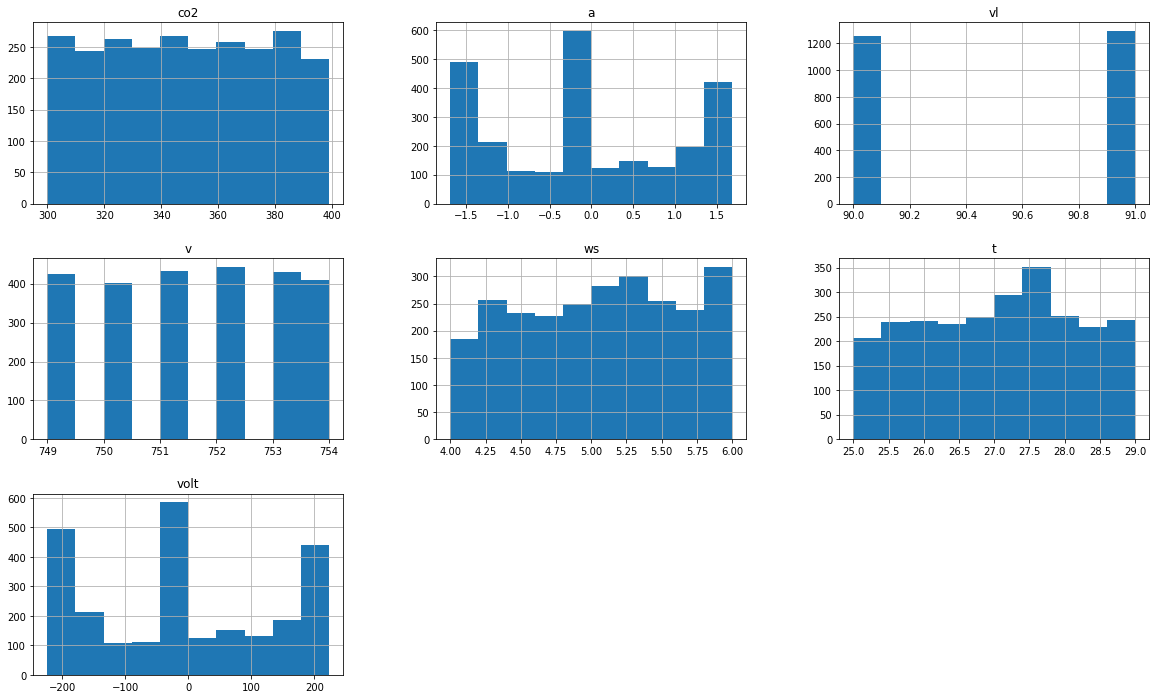

In [ ]:
# гистограммы распределения признаков
exp_df[param_cols].hist(figsize=(20, 12));

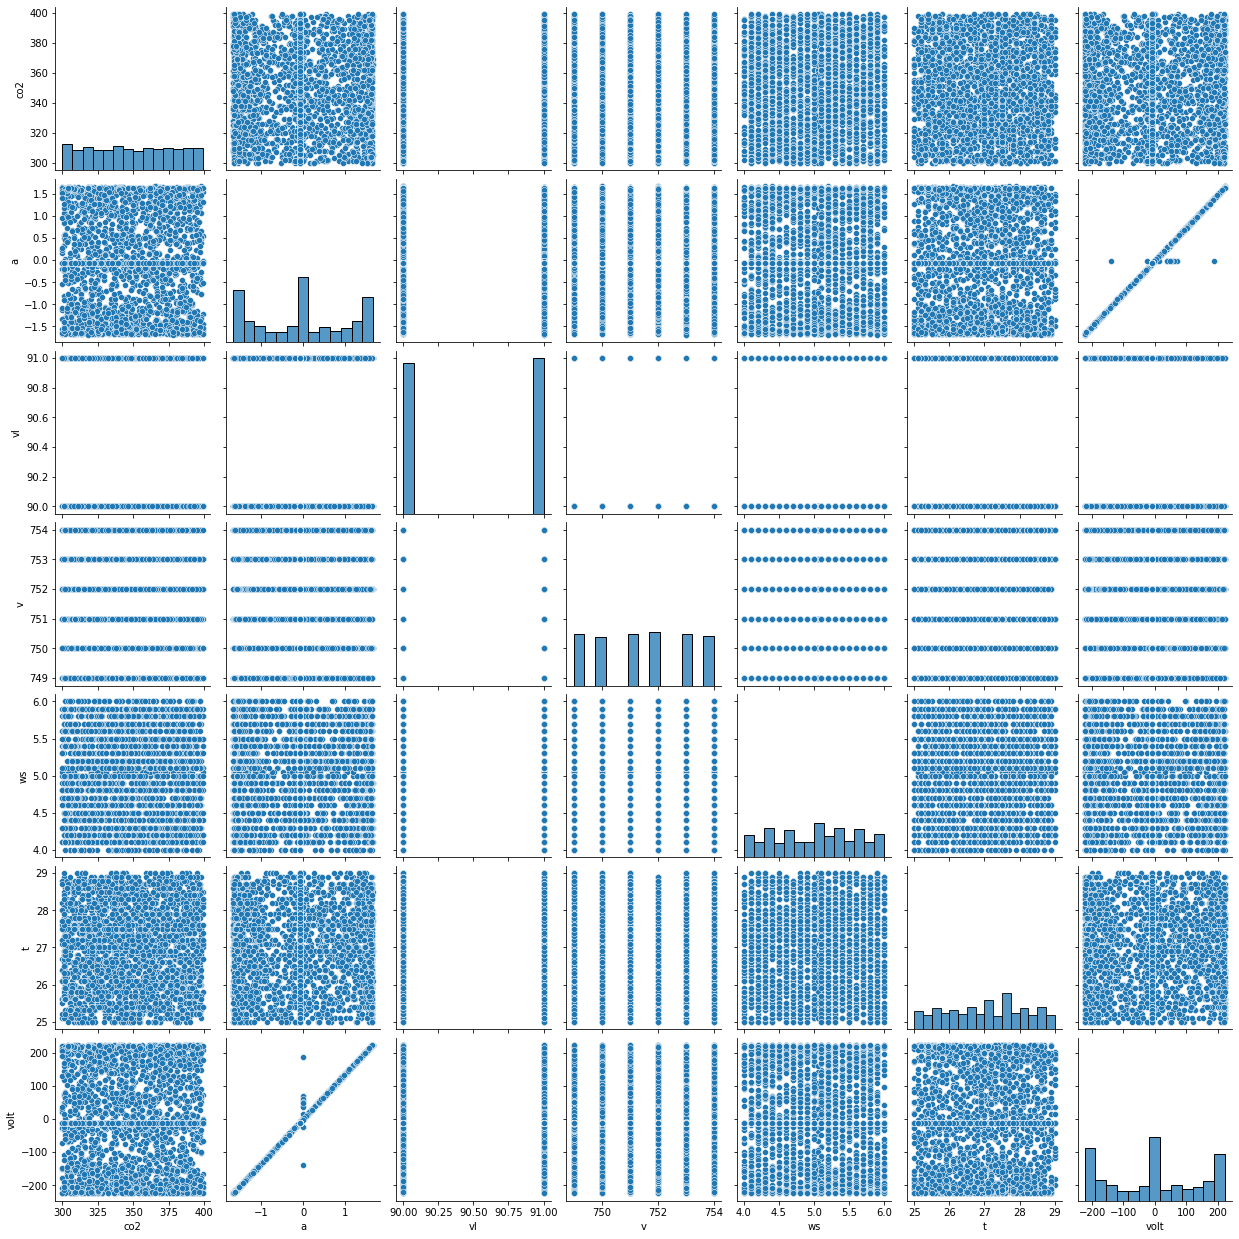

In [ ]:
# Парный график признаков
sns.pairplot(exp_df[param_cols]);

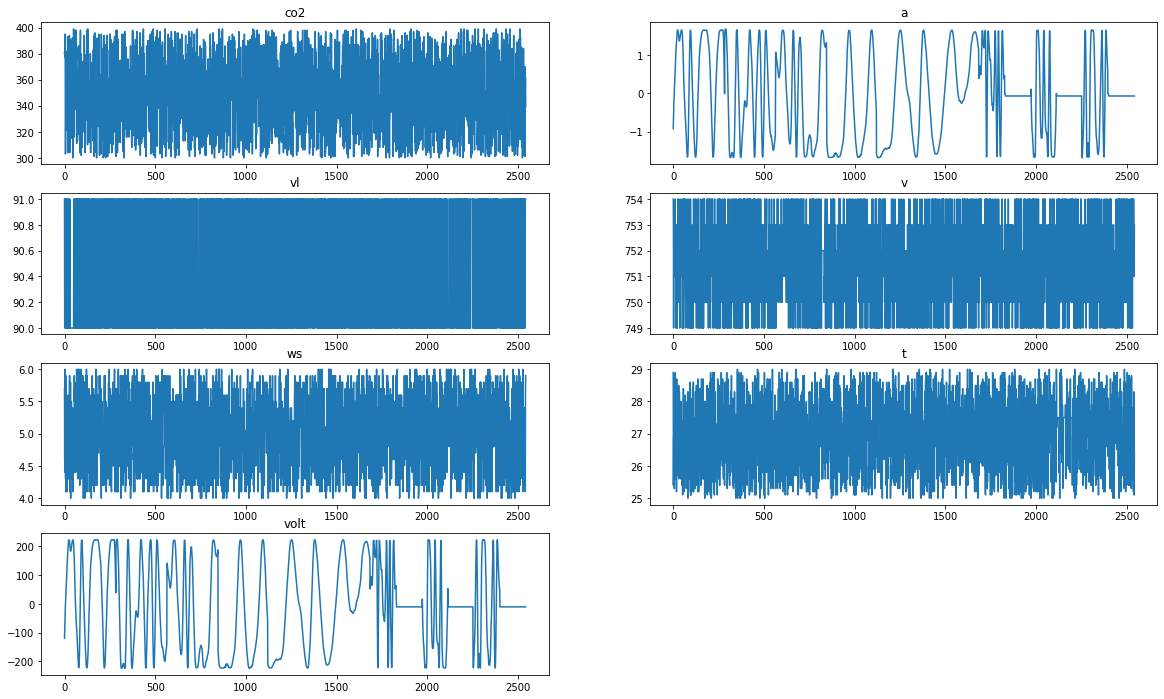

In [ ]:
# график фактических значений
plt.figure(figsize=(20,12))
for i, col in enumerate(param_cols):
    plt.subplot(4, 2, i + 1)
    plt.plot(exp_df[col])
    plt.title(col);

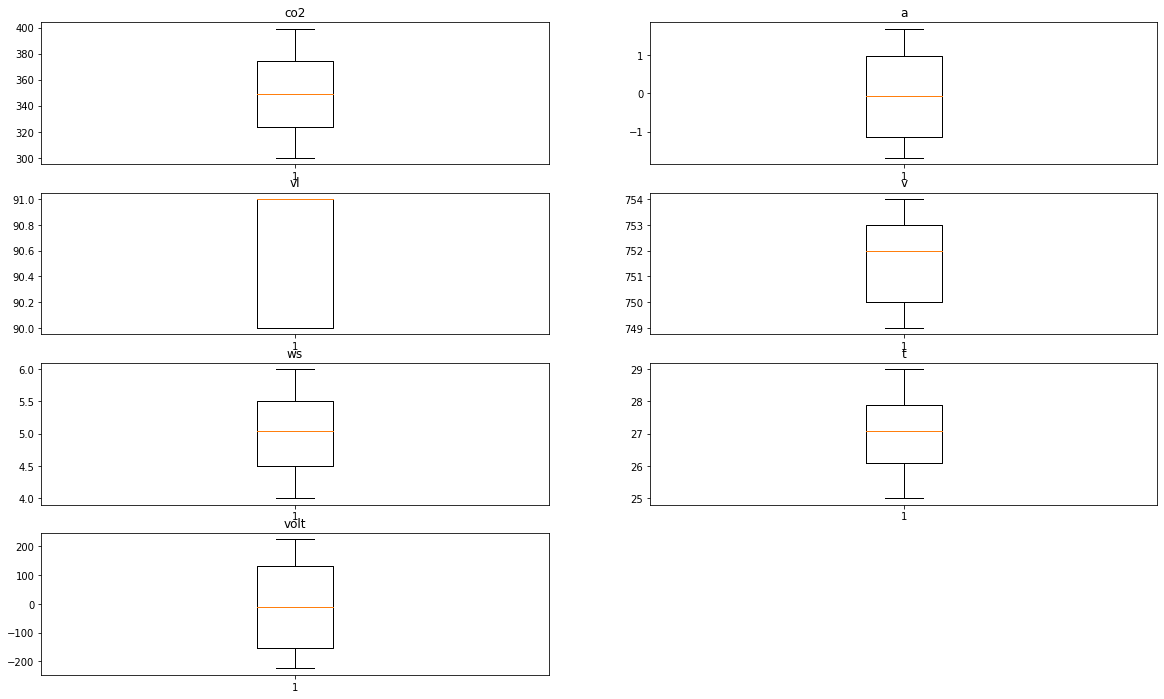

In [ ]:
# график ящик с усами для всех признаков значений
plt.figure(figsize=(20,12))
for i, col in enumerate(param_cols):
    plt.subplot(4, 2, i + 1)
    plt.boxplot(exp_df[col])
    plt.title(col);

Выбросов нет.

## 2 Сглаживание данных

Центрированная скользящая средняя

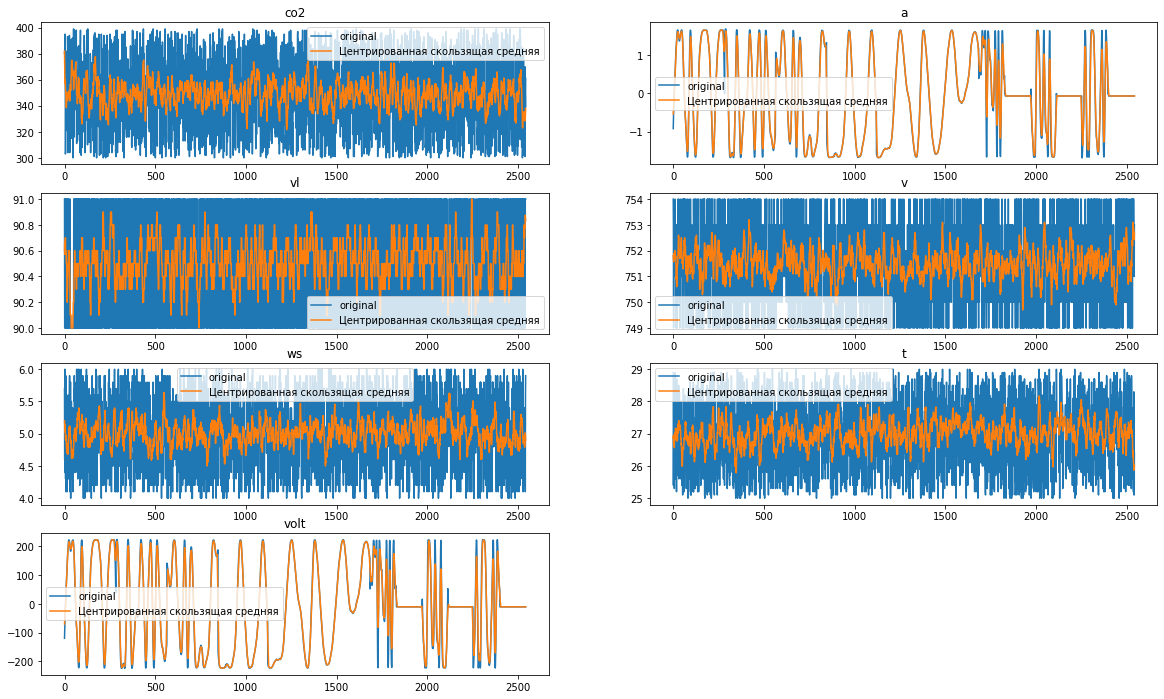

In [ ]:
plt.figure(figsize=(20,12))
for i, col in enumerate(param_cols):
    plt.subplot(4, 2, i + 1)
    plt.plot(exp_df[col])
    plt.plot(exp_df[col].rolling(10, min_periods=1, center=True).mean())
    plt.title(col)
    plt.legend(['original', 'Центрированная скользящая средняя']);

Экспоненциальное сглаживание

In [ ]:
def exponential_smoothing(series, alpha):
    result = [series[0]]    #first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [ ]:
def plot_exponential_smoothing(series, alphas):
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        plt.plot(exponential_smoothing(series, alpha), label = 'Alpha {}'.format(alpha))
    plt.plot(series.values, "c", label="Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Exponential Smoothing")
    plt.grid(True)

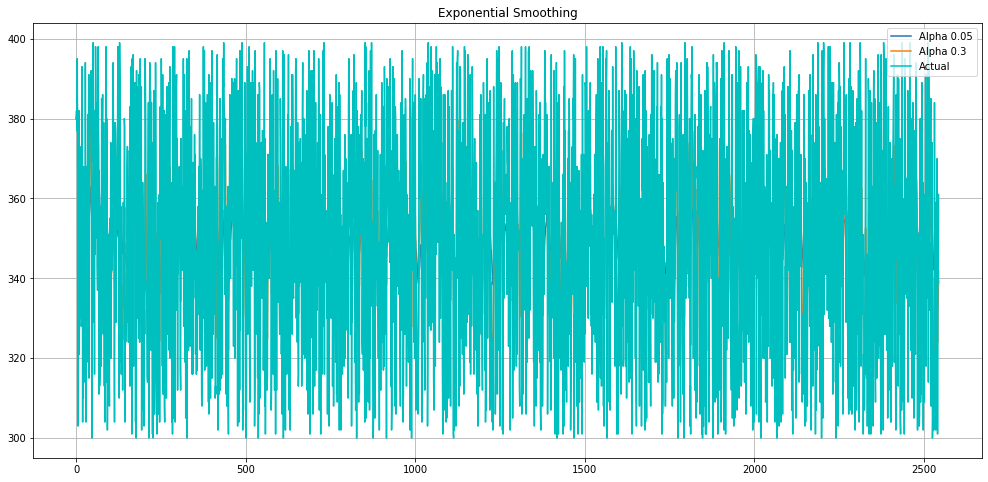

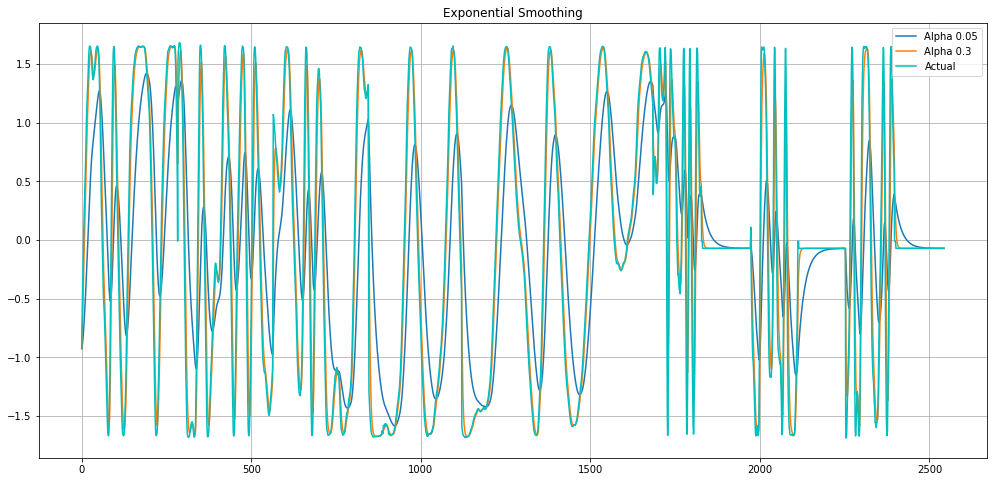

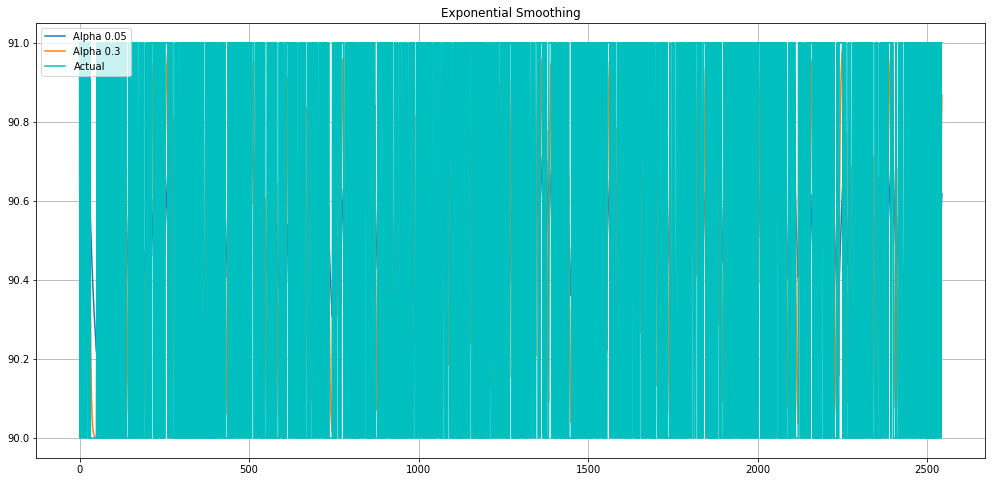

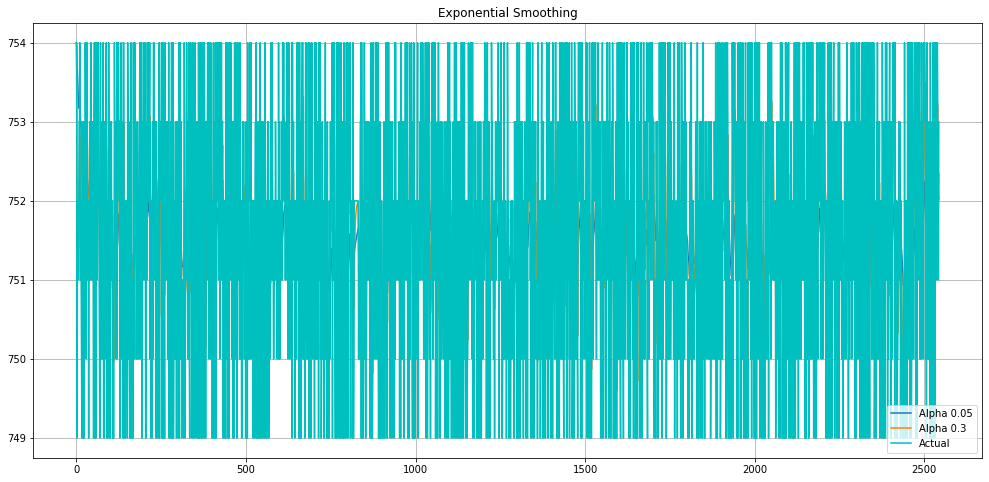

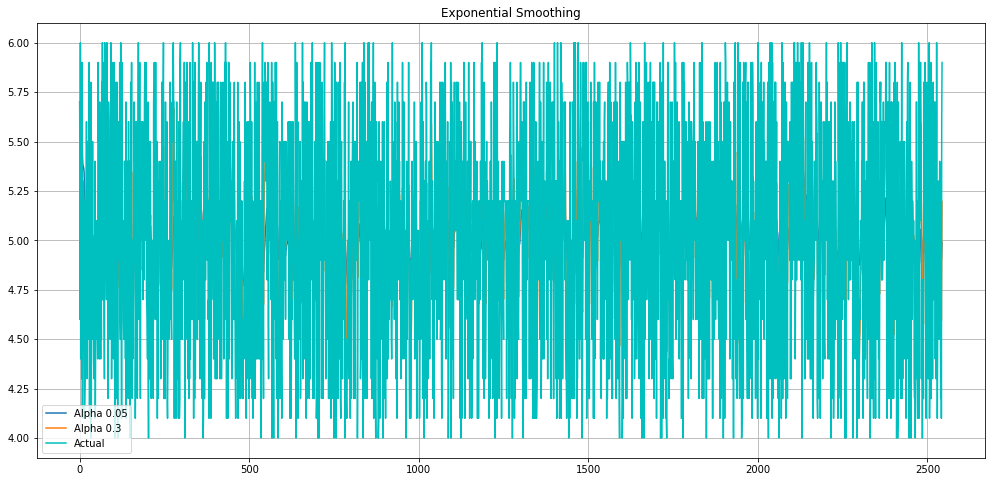

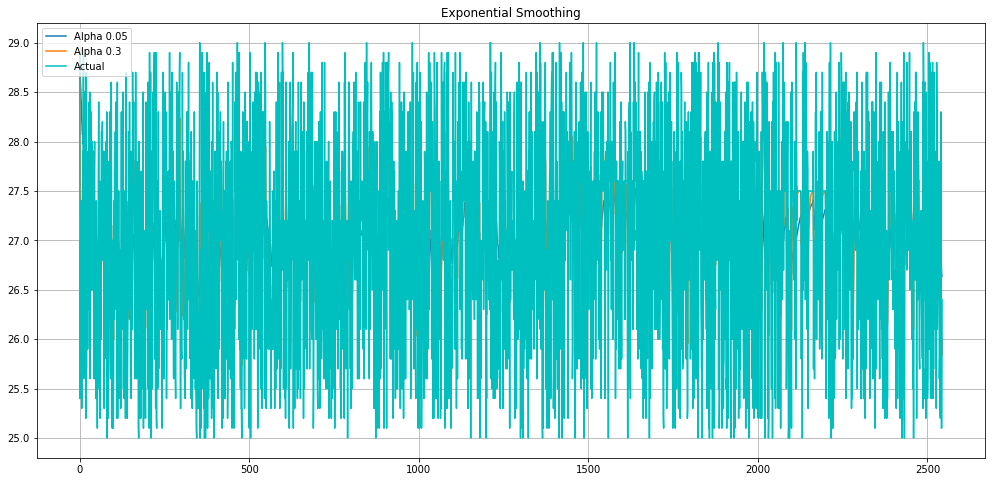

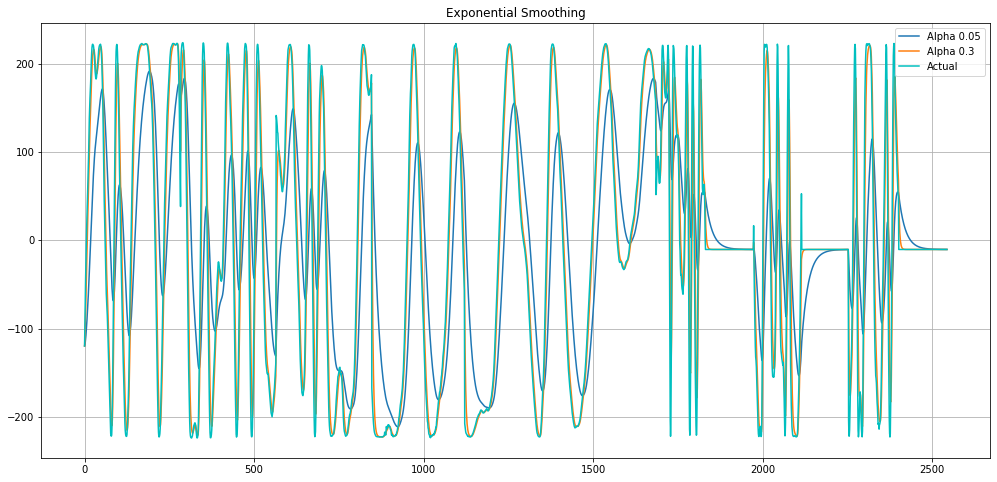

In [ ]:
for col in param_cols:
    plot_exponential_smoothing(exp_df[col], [0.05, 0.3])

Заполняющая трансформация

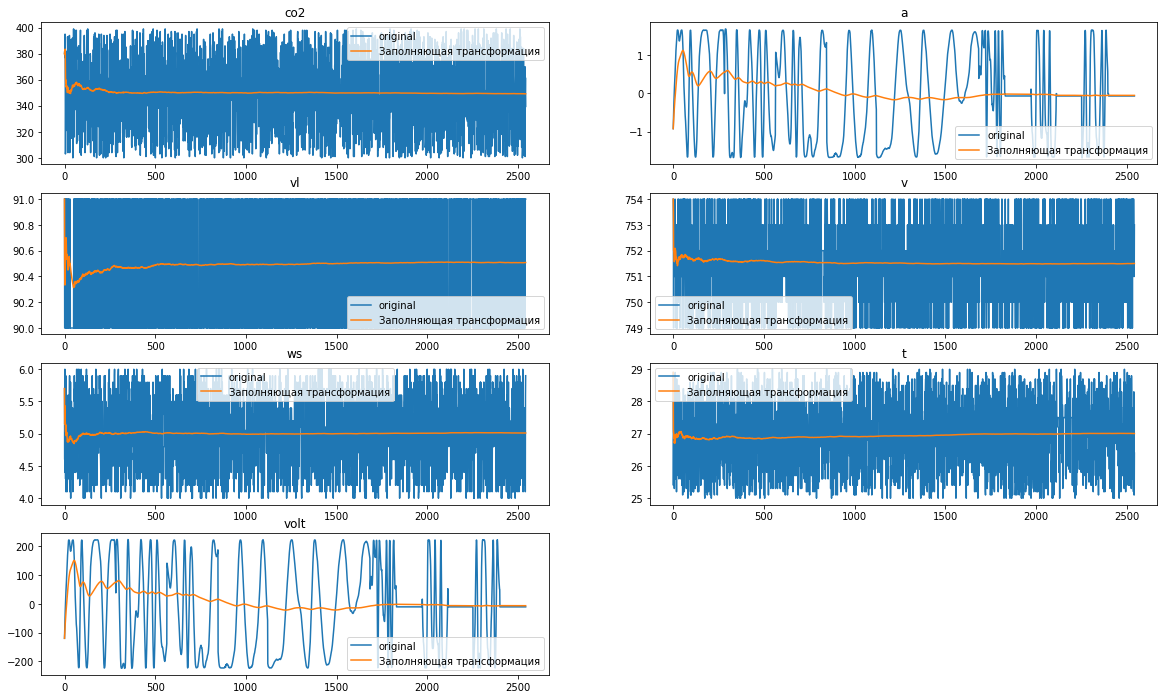

In [ ]:
plt.figure(figsize=(20,12))
for i, col in enumerate(param_cols):
    plt.subplot(4, 2, i + 1)
    plt.plot(exp_df[col])
    plt.plot(exp_df[col].expanding(min_periods=1, center=None, axis=0, method='single').mean())
    plt.title(col)
    plt.legend(['original', 'Заполняющая трансформация']);

Остановимся на центрированной скользящей средней и применим этот метод

In [ ]:
for col in param_cols:
    exp_df[col] = exp_df[col].rolling(10, min_periods=1, center=True).mean()

## 3 Фильтрация сигналов

Low-Pass Filter

In [ ]:
# First, design the Buterworth filter
N  = 3    # Filter order
Wn = 0.1 # Cutoff frequency

Для каждого звука на первые 5 секунд применим Low-Pass Filter

0it [00:00, ?it/s]

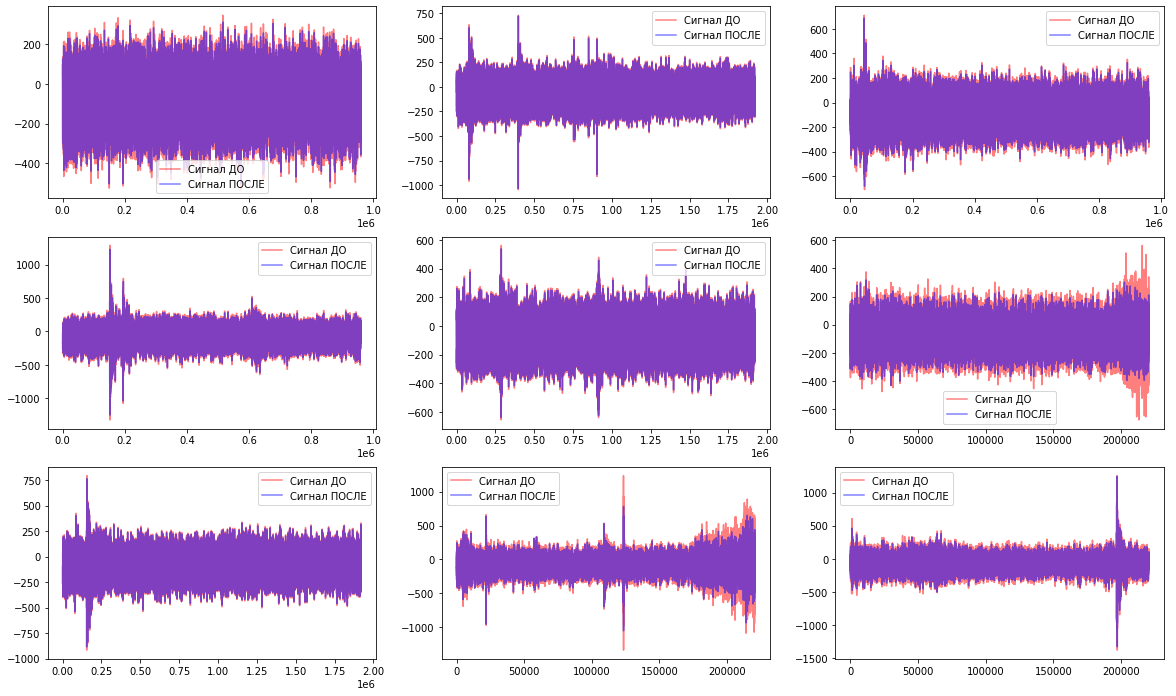

In [ ]:
plt.figure(figsize=(20,12))
for i, df in tqdm(enumerate(waves_dfs)):
    B, A = signal.butter(N, Wn, output='ba')
    smooth_data = signal.filtfilt(B, A, waves_dfs[i][1][:waves_dfs[i][0] * 5])
    
    subplot(3, 3, i + 1)
    plt.plot(waves_dfs[i][1][:waves_dfs[i][0] * 5],'r-', alpha=0.5)
    plt.plot(smooth_data,'b-', alpha=0.5)
    plt.legend(['Сигнал ДО', 'Сигнал ПОСЛЕ']);

Применим этот фильтр на уже готовом датасете

In [ ]:
smooth_data = signal.filtfilt(B, A, exp_df['w'])

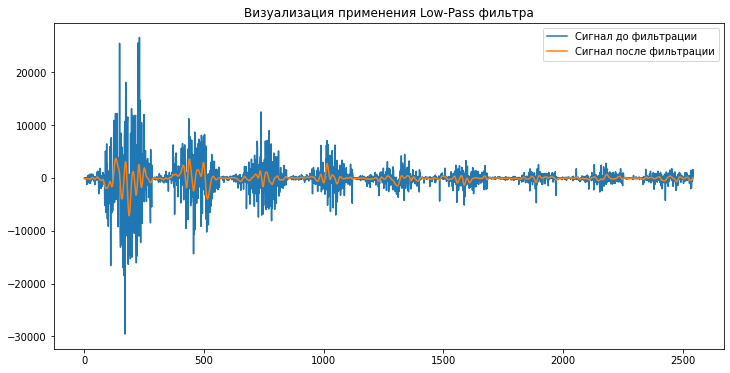

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(exp_df['w'])
plt.plot(smooth_data)
plt.title('Визуализация применения Low-Pass фильтра')
plt.legend(['Сигнал до фильтрации', 'Сигнал после фильтрации']);

In [ ]:
exp_df['w'] = smooth_data

In [ ]:
del smooth_data

## 4 Спектральный анализ данных

Спектрограммы сигналов

In [ ]:
wav_files = ['C:\\data\\11.wav', 'C:\\data\\18.wav', 'C:\\data\\28.wav', 'C:\\data\\29.wav', 'C:\\data\\30.wav', 'C:\\data\\40.wav', 'C:\\data\\5.wav', 'C:\\data\\60.wav', 'C:\\data\\66.wav']

In [ ]:
N = 512 #Number of point in the fft

0it [00:00, ?it/s]

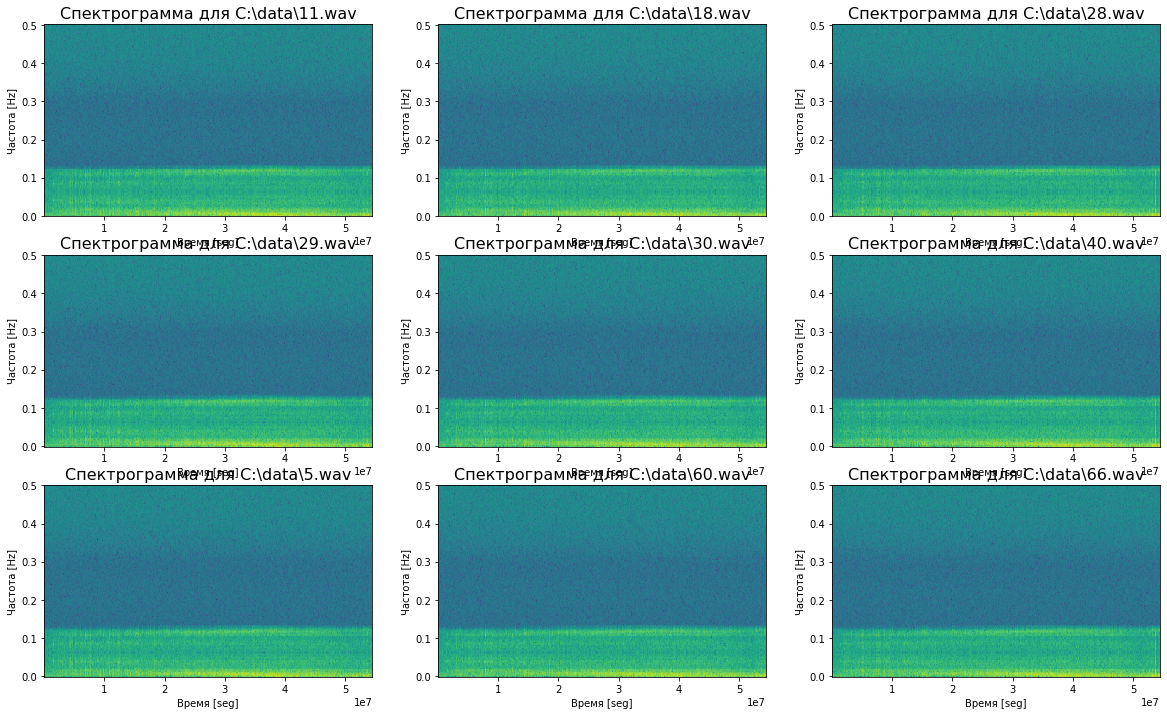

In [ ]:
plt.figure(figsize=(20,12))
for i, wav_pair in tqdm(enumerate(waves_dfs)):
    f, t, Sxx = signal.spectrogram(waves_dfs[0][1],window = signal.blackman(N),nfft=N)
    
    plt.subplot(3, 3, i + 1)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx)) # dB spectrogram
    #plt.pcolormesh(t, f,Sxx) # Lineal spectrogram
    plt.ylabel('Частота [Hz]')
    plt.xlabel('Время [seg]')
    plt.title(f'Спектрограмма для {wav_files[i]}', size=16);

## 5 Создание итогового набора данных

Весь этот модуль посвящён созданию единого итогового набора данных. Осталось лишь добавить недостающие параметры

In [ ]:
# мощность тока
exp_df['p'] = exp_df['a'] * exp_df['volt']

In [ ]:
# Температура теплоносителя посекундно
exp_df['t_teplo'] = hash('dummy')

In [ ]:
# Информативные частоты акустических сигналов
exp_df['acoustic_info'] = hash('dummy^2')

In [ ]:
# возврат частоты по номеру эксперимента
def ret_herz(num):
    if num in [1, 2, 3]:
        return 5000
    elif num in [4, 5, 6]:
        return 500000
    elif num in [7, 8, 9]:
        return 1000000

In [ ]:
# Информативные характеристики параметров тока и напряжения
# добавим частоту
exp_df['herz'] = exp_df['num_experiment'].apply(ret_herz)

сохраняем итоговый датасет

In [ ]:
%%time
try:
    with open('exp_df.data', 'wb') as f:
        pkl.dump(exp_df, f)
except Exception as e:
    print(e)

CPU times: total: 93.8 ms
Wall time: 592 ms
